# HW 0 - Intro to Pandas
**This homework assignment is a Colab Notebook. Before running or editing anything, make a copy of the notebook. That way it will actually save the progress**

Credit: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Read through the below and run the cells to get a feeling for how Pandas works.


In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Object Creation


Creating a Series by passing a list of values, letting pandas create a default integer index:

In [202]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [137]:
dates = pd.date_range('20130101', periods=6)
dates
df

,A,B,C,D
2013-01-01,-0.922595,-1.304873,0.383049,1.791854
2013-01-02,1.706466,-1.476799,-0.964749,0.440147
2013-01-03,-1.417246,-1.150532,0.177334,-0.092352
2013-01-04,1.047633,-0.592612,0.446103,1.376440
2013-01-05,-0.794884,2.188584,-0.085717,0.372825
2013-01-06,1.098320,-0.512301,-1.145809,1.357124


In [140]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.732928,0.118780,0.387224,-0.098532
2013-01-02,1.913993,0.244613,-0.474625,-0.914188
2013-01-03,0.045355,-0.338482,0.251523,-0.980263
2013-01-04,-0.495663,-1.182703,1.527127,0.895780
2013-01-05,-0.471881,0.328684,0.296453,-1.222206
2013-01-06,-0.878843,-0.151679,0.567661,0.036810


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [15]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [16]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

View the top and bottom rows of the frame:

In [17]:
df.head()

,A,B,C,D
2013-01-01,0.834132,1.297826,0.279996,-1.666460
2013-01-02,1.312300,-0.845443,-1.522566,-0.682330
2013-01-03,1.639431,0.418370,0.685941,-2.410732
2013-01-04,-2.033264,1.034783,1.239950,-0.390757
2013-01-05,0.963781,0.684165,-0.112072,0.787293


In [18]:
df.tail(3)

,A,B,C,D
2013-01-04,-2.033264,1.034783,1.239950,-0.390757
2013-01-05,0.963781,0.684165,-0.112072,0.787293
2013-01-06,-0.327223,-2.201532,-1.136289,-0.721265


Display the index, columns:

In [19]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [23]:
df.values

array([[ 0.83413219,  1.29782593,  0.27999562, -1.66645998],
       [ 1.31229993, -0.84544322, -1.52256646, -0.68233037],
       [ 1.63943076,  0.41836986,  0.68594115, -2.41073231],
       [-2.03326371,  1.0347833 ,  1.23994965, -0.39075702],
       [ 0.96378121,  0.68416529, -0.11207187,  0.78729263],
       [-0.32722263, -2.20153165, -1.13628908, -0.72126485]])

In [26]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

.describe( ) shows a quick statistic summary of your data:

In [29]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.398193,0.064695,-0.094173,-0.847375
std,1.365606,1.336761,1.063494,1.098978
min,-2.033264,-2.201532,-1.522566,-2.410732
25%,-0.036884,-0.529490,-0.880235,-1.430161
50%,0.898957,0.551268,0.083962,-0.701798
75%,1.225170,0.947129,0.584455,-0.463650
max,1.639431,1.297826,1.239950,0.787293


Transposing your data:

In [30]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.834132,1.312300,1.639431,-2.033264,0.963781,-0.327223
B,1.297826,-0.845443,0.418370,1.034783,0.684165,-2.201532
C,0.279996,-1.522566,0.685941,1.239950,-0.112072,-1.136289
D,-1.666460,-0.682330,-2.410732,-0.390757,0.787293,-0.721265


Sorting by an axis:

In [31]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.666460,0.279996,1.297826,0.834132
2013-01-02,-0.682330,-1.522566,-0.845443,1.312300
2013-01-03,-2.410732,0.685941,0.418370,1.639431
2013-01-04,-0.390757,1.239950,1.034783,-2.033264
2013-01-05,0.787293,-0.112072,0.684165,0.963781
2013-01-06,-0.721265,-1.136289,-2.201532,-0.327223


Sorting by values:

In [32]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-0.327223,-2.201532,-1.136289,-0.721265
2013-01-02,1.312300,-0.845443,-1.522566,-0.682330
2013-01-03,1.639431,0.418370,0.685941,-2.410732
2013-01-05,0.963781,0.684165,-0.112072,0.787293
2013-01-04,-2.033264,1.034783,1.239950,-0.390757
2013-01-01,0.834132,1.297826,0.279996,-1.666460


## Selection

### Getting

Selecting a single column, which yields a Series, equivalent to df.A:

In [33]:
df['A']

2013-01-01    0.834132
2013-01-02    1.312300
2013-01-03    1.639431
2013-01-04   -2.033264
2013-01-05    0.963781
2013-01-06   -0.327223
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [34]:
df[0:3]

,A,B,C,D
2013-01-01,0.834132,1.297826,0.279996,-1.666460
2013-01-02,1.312300,-0.845443,-1.522566,-0.682330
2013-01-03,1.639431,0.418370,0.685941,-2.410732


In [35]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.312300,-0.845443,-1.522566,-0.682330
2013-01-03,1.639431,0.418370,0.685941,-2.410732
2013-01-04,-2.033264,1.034783,1.239950,-0.390757


### Selection by label

For getting a cross section using a label:

In [227]:
df.loc[dates[0]]

A   -0.732928
B    0.118780
C    0.387224
D   -0.098532
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [37]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.834132,1.297826
2013-01-02,1.312300,-0.845443
2013-01-03,1.639431,0.418370
2013-01-04,-2.033264,1.034783
2013-01-05,0.963781,0.684165
2013-01-06,-0.327223,-2.201532


Showing label slicing, both endpoints are included:

In [39]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,1.312300,-0.845443
2013-01-03,1.639431,0.418370
2013-01-04,-2.033264,1.034783


Reduction in the dimensions of the returned object:

In [40]:
df.loc['20130102', ['A', 'B']]

A    1.312300
B   -0.845443
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [41]:
df.loc[dates[0], 'A']

0.8341321874580757

For getting fast access to a scalar (equivalent to the prior method):

In [43]:
df.at[dates[0], 'A']

0.8341321874580757

### Selection by position

Select via the position of the passed integers:

In [44]:
print(df)
df.iloc[3]

                   A         B         C         D
2013-01-01  0.834132  1.297826  0.279996 -1.666460
2013-01-02  1.312300 -0.845443 -1.522566 -0.682330
2013-01-03  1.639431  0.418370  0.685941 -2.410732
2013-01-04 -2.033264  1.034783  1.239950 -0.390757
2013-01-05  0.963781  0.684165 -0.112072  0.787293
2013-01-06 -0.327223 -2.201532 -1.136289 -0.721265


A   -2.033264
B    1.034783
C    1.239950
D   -0.390757
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [45]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-2.033264,1.034783
2013-01-05,0.963781,0.684165


By lists of integer position locations, similar to the numpy/python style:

In [46]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.312300,-1.522566
2013-01-03,1.639431,0.685941
2013-01-05,0.963781,-0.112072


For slicing rows explicitly:

In [47]:
print(df)
df.iloc[1:3, :]

                   A         B         C         D
2013-01-01  0.834132  1.297826  0.279996 -1.666460
2013-01-02  1.312300 -0.845443 -1.522566 -0.682330
2013-01-03  1.639431  0.418370  0.685941 -2.410732
2013-01-04 -2.033264  1.034783  1.239950 -0.390757
2013-01-05  0.963781  0.684165 -0.112072  0.787293
2013-01-06 -0.327223 -2.201532 -1.136289 -0.721265


,A,B,C,D
2013-01-02,1.312300,-0.845443,-1.522566,-0.682330
2013-01-03,1.639431,0.418370,0.685941,-2.410732


For slicing columns explicitly:

In [48]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.297826,0.279996
2013-01-02,-0.845443,-1.522566
2013-01-03,0.418370,0.685941
2013-01-04,1.034783,1.239950
2013-01-05,0.684165,-0.112072
2013-01-06,-2.201532,-1.136289


For getting a value explicitly:

In [49]:
df.iloc[1, 1]

-0.8454432228304201

For getting fast access to a scalar (equivalent to the prior method):

In [50]:
df.iat[1, 1]

-0.8454432228304201

### Boolean Indexing

Selecting values from a DataFrame where a boolean condition is met.

In [51]:
df[df > 0]

,A,B,C,D
2013-01-01,0.834132,1.297826,0.279996,NaN
2013-01-02,1.312300,NaN,NaN,NaN
2013-01-03,1.639431,0.418370,0.685941,NaN
2013-01-04,NaN,1.034783,1.239950,NaN
2013-01-05,0.963781,0.684165,NaN,0.787293
2013-01-06,NaN,NaN,NaN,NaN


Using the isin() method for filtering:

In [56]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.834132,1.297826,0.279996,-1.666460,one
2013-01-02,1.312300,-0.845443,-1.522566,-0.682330,one
2013-01-03,1.639431,0.418370,0.685941,-2.410732,two
2013-01-04,-2.033264,1.034783,1.239950,-0.390757,three
2013-01-05,0.963781,0.684165,-0.112072,0.787293,four
2013-01-06,-0.327223,-2.201532,-1.136289,-0.721265,three


In [58]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1.639431,0.418370,0.685941,-2.410732,two
2013-01-05,0.963781,0.684165,-0.112072,0.787293,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [60]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [64]:
df['F'] = s1

Setting values by label:

In [68]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,1.297826,0.279996,-1.666460,NaN
2013-01-02,1.312300,-0.845443,-1.522566,-0.682330,1.0
2013-01-03,1.639431,0.418370,0.685941,-2.410732,2.0
2013-01-04,-2.033264,1.034783,1.239950,-0.390757,3.0
2013-01-05,0.963781,0.684165,-0.112072,0.787293,4.0
2013-01-06,-0.327223,-2.201532,-1.136289,-0.721265,5.0


Setting values by position:

In [71]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279996,-1.666460,NaN
2013-01-02,1.312300,-0.845443,-1.522566,-0.682330,1.0
2013-01-03,1.639431,0.418370,0.685941,-2.410732,2.0
2013-01-04,-2.033264,1.034783,1.239950,-0.390757,3.0
2013-01-05,0.963781,0.684165,-0.112072,0.787293,4.0
2013-01-06,-0.327223,-2.201532,-1.136289,-0.721265,5.0


Setting by assigning with a NumPy array:

In [75]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279996,5,NaN
2013-01-02,1.312300,-0.845443,-1.522566,5,1.0
2013-01-03,1.639431,0.418370,0.685941,5,2.0
2013-01-04,-2.033264,1.034783,1.239950,5,3.0
2013-01-05,0.963781,0.684165,-0.112072,5,4.0
2013-01-06,-0.327223,-2.201532,-1.136289,5,5.0


The result of the prior setting operations.

In [76]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279996,5,NaN
2013-01-02,1.312300,-0.845443,-1.522566,5,1.0
2013-01-03,1.639431,0.418370,0.685941,5,2.0
2013-01-04,-2.033264,1.034783,1.239950,5,3.0
2013-01-05,0.963781,0.684165,-0.112072,5,4.0
2013-01-06,-0.327223,-2.201532,-1.136289,5,5.0


A where operation with setting.

In [77]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.279996,-5,NaN
2013-01-02,-1.312300,-0.845443,-1.522566,-5,-1.0
2013-01-03,-1.639431,-0.418370,-0.685941,-5,-2.0
2013-01-04,-2.033264,-1.034783,-1.239950,-5,-3.0
2013-01-05,-0.963781,-0.684165,-0.112072,-5,-4.0
2013-01-06,-0.327223,-2.201532,-1.136289,-5,-5.0


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [80]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.279996,5,NaN
2013-01-02,1.312300,-0.845443,-1.522566,5,1.0
2013-01-03,1.639431,0.418370,0.685941,5,2.0
2013-01-04,-2.033264,1.034783,1.239950,5,3.0
2013-01-05,0.963781,0.684165,-0.112072,5,4.0
2013-01-06,-0.327223,-2.201532,-1.136289,5,5.0


In [82]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.279996,5,NaN,1.0
2013-01-02,1.312300,-0.845443,-1.522566,5,1.0,1.0
2013-01-03,1.639431,0.418370,0.685941,5,2.0,NaN
2013-01-04,-2.033264,1.034783,1.239950,5,3.0,NaN


** To drop any rows that have missing data. **

In [83]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,1.3123,-0.845443,-1.522566,5,1.0,1.0


Filling missing data.

In [84]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.279996,5,5.0,1.0
2013-01-02,1.312300,-0.845443,-1.522566,5,1.0,1.0
2013-01-03,1.639431,0.418370,0.685941,5,2.0,5.0
2013-01-04,-2.033264,1.034783,1.239950,5,3.0,5.0


To get the boolean mask where values are nan

In [85]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Performing a descriptive statistic:

In [86]:
df.mean()

A    0.259171
B   -0.151609
C   -0.094173
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [87]:
df.mean(1)

2013-01-01    1.319999
2013-01-02    0.988858
2013-01-03    1.948748
2013-01-04    1.648294
2013-01-05    2.107175
2013-01-06    1.266991
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [93]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
print(df)
s

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.279996  5  NaN
2013-01-02  1.312300 -0.845443 -1.522566  5  1.0
2013-01-03  1.639431  0.418370  0.685941  5  2.0
2013-01-04 -2.033264  1.034783  1.239950  5  3.0
2013-01-05  0.963781  0.684165 -0.112072  5  4.0
2013-01-06 -0.327223 -2.201532 -1.136289  5  5.0


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [94]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.639431,-0.581630,-0.314059,4.0,1.0
2013-01-04,-5.033264,-1.965217,-1.760050,2.0,0.0
2013-01-05,-4.036219,-4.315835,-5.112072,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data:

In [275]:
df.apply(np.cumsum)

,A,B,C,D
2000-01-01,1.499286,1.531362,0.252821,0.685678
2000-01-02,3.388064,3.076320,0.573913,2.206982
2000-01-03,5.056448,4.790051,1.786739,2.891627
2000-01-04,7.884983,6.656852,5.077688,2.862947
2000-01-05,10.635111,7.482376,10.533489,3.248733
...,...,...,...,...
2002-09-22,-2095.494835,5360.384897,31387.299874,21971.405026
2002-09-23,-2123.813507,5377.269080,31433.736223,22011.617189
2002-09-24,-2152.814350,5393.441232,31480.656574,22050.075595
2002-09-25,-2182.207222,5409.025116,31527.435371,22089.079572


### Histrogramming

In [97]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    3
2    0
3    5
4    1
5    0
6    6
7    6
8    3
9    3
dtype: int64

In [98]:
s.value_counts()

3    3
0    2
6    2
4    1
5    1
1    1
dtype: int64

### String Method

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [101]:
s = pd.Series(['A', 'B', 'C', 'AaBa', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    AaBa
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [102]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [233]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.179076,0.634578,-1.382054,0.219768
1,-0.967061,-1.355223,1.935794,0.609715
2,-0.032285,2.480779,-1.210707,1.979056
3,-1.510430,1.553275,-0.061768,0.191408
4,-0.236981,0.119871,0.199423,0.166108
5,0.971459,-0.059250,-0.285139,0.213504
6,0.268609,-0.984758,-1.121151,-0.803909
7,0.007525,0.018197,0.003506,0.050929
8,1.547124,-0.103318,0.008752,-1.227352
9,2.042077,-0.768313,-0.719392,-0.604373


In [234]:
# Break it into pieces
pieces = [df[0:3], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.179076,0.634578,-1.382054,0.219768
1,-0.967061,-1.355223,1.935794,0.609715
2,-0.032285,2.480779,-1.210707,1.979056
7,0.007525,0.018197,0.003506,0.050929
8,1.547124,-0.103318,0.008752,-1.227352
9,2.042077,-0.768313,-0.719392,-0.604373


### Join

SQL style merges

In [235]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another Example:

In [236]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe.

In [237]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.155894,-2.395603,0.124703,0.349266
1,-0.664510,-0.486544,-0.237201,1.799932
2,-0.304529,0.261698,0.128757,0.065107
3,1.184995,-1.546077,-0.781215,-0.109543
4,0.721598,0.065004,-0.475970,0.832692
5,0.650257,1.458582,-1.152919,-0.941390
6,1.757456,-0.433245,-0.264888,0.397888
7,-0.930166,-1.274668,0.008794,0.657211


In [238]:
s = df.iloc[3]
df.append(s, ignore_index=True)

<ipython-input-238-5c75beae9d7c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,-0.155894,-2.395603,0.124703,0.349266
1,-0.664510,-0.486544,-0.237201,1.799932
2,-0.304529,0.261698,0.128757,0.065107
3,1.184995,-1.546077,-0.781215,-0.109543
4,0.721598,0.065004,-0.475970,0.832692
5,0.650257,1.458582,-1.152919,-0.941390
6,1.757456,-0.433245,-0.264888,0.397888
7,-0.930166,-1.274668,0.008794,0.657211
8,1.184995,-1.546077,-0.781215,-0.109543


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [239]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,2.076863,0.657223
1,bar,one,0.399686,-0.973798
2,foo,two,-1.056702,0.377487
3,bar,three,-0.934165,-1.379129
4,foo,two,-0.728384,-0.307802
5,bar,two,-0.669100,-0.238020
6,foo,one,-0.123564,-0.523479
7,foo,three,-1.129881,-0.762171


Grouping and then applying the sum() function to the resulting groups.

In [240]:
df.groupby('A').sum()

<ipython-input-240-180a798bba5b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,-1.203578,-2.590948
foo,-0.961669,-0.558742


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [241]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.399686 -0.973798
    three -0.934165 -1.379129
    two   -0.669100 -0.238020
foo one    1.953298  0.133744
    three -1.129881 -0.762171
    two   -1.785085  0.069685

## Plotting

<Axes: >

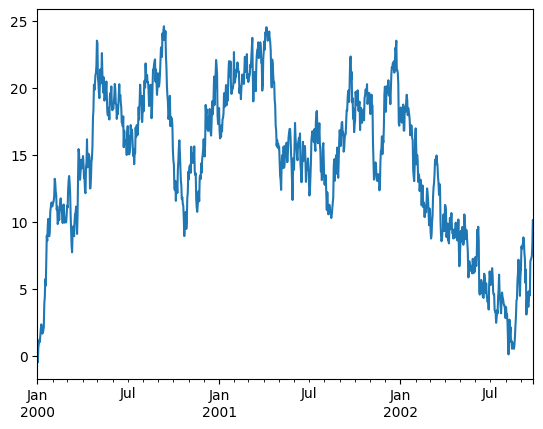

In [242]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Axes: >

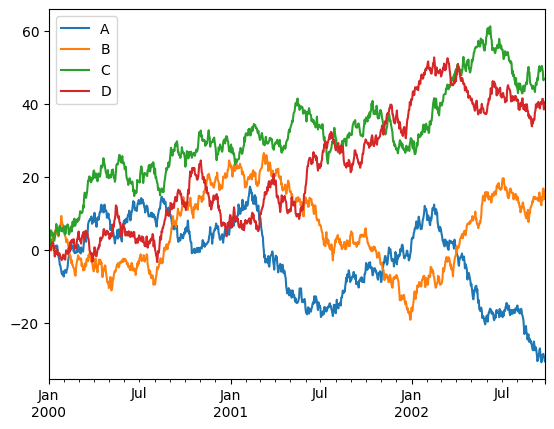

In [243]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()

## Getting data in/out

### CSV

In [244]:
df.to_csv('foo.csv')

In [245]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.499286,1.531362,0.252821,0.685678
1,2000-01-02,1.888778,1.544958,0.321092,1.521304
2,2000-01-03,1.668384,1.713731,1.212826,0.684645
3,2000-01-04,2.828535,1.866801,3.290949,-0.028680
4,2000-01-05,2.750127,0.825524,5.455801,0.385785


# Your Turn!

Use Pandas to solve these problems.

We have already imported pandas. Now we have a CSV file that we would like to read into a pandas data frame and perform operations on it. We will be using a database of diamonds.

<b> 0) First, read the file. It is located at https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv

In [311]:
diamonds = pd.read_csv('diamonds.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<b> 1) Sample 10 random diamonds and display them.

In [312]:
diamonds_ten = diamonds.sample(10)
diamonds_ten

,carat,cut,color,clarity,depth,table,price,x,y,z
45116,0.71,Good,I,SI1,60.0,64.0,1651,5.71,5.79,3.45
52221,0.71,Premium,F,SI2,61.6,59.0,2482,5.75,5.71,3.53
51950,0.70,Premium,E,SI2,60.6,58.0,2442,5.78,5.73,3.49
25628,2.01,Premium,F,SI1,59.5,58.0,14502,8.21,8.18,4.88
10754,1.09,Very Good,F,SI2,63.2,58.0,4853,6.54,6.49,4.12
16623,1.07,Premium,G,VS2,62.5,57.0,6644,6.58,6.50,4.09
24871,1.57,Premium,F,SI1,58.3,58.0,13288,7.72,7.68,4.49
36008,0.31,Ideal,F,IF,61.1,54.0,921,4.39,4.42,2.69
53568,0.70,Good,E,SI1,60.4,61.0,2696,5.73,5.76,3.47
20673,1.03,Ideal,G,VVS1,59.9,61.0,8955,6.56,6.63,3.95


<b> 2) Display some statistics (mean, standard deviation, quartiles) about the numerical columns in the data

In [313]:
diamonds_ten.describe()

,carat,depth,table,price,x,y,z
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.990000,60.710000,58.800000,5843.400000,6.297000,6.289000,3.816000
std,0.492409,1.448716,2.699794,4902.133644,1.093517,1.074021,0.621954
min,0.310000,58.300000,54.000000,921.000000,4.390000,4.420000,2.690000
25%,0.702500,59.925000,58.000000,2452.000000,5.735000,5.737500,3.475000
50%,0.870000,60.500000,58.000000,3774.500000,6.160000,6.140000,3.740000
75%,1.085000,61.475000,60.500000,8377.250000,6.575000,6.597500,4.112500
max,2.010000,63.200000,64.000000,14502.000000,8.210000,8.180000,4.880000


<b> 3) For the non-numerical columns, we would like to count how many of one value we have. In other words, pick one of (cut, color, clarity) and count the number of values. You can also display a histogram to get a visual of the distributions.

In [314]:
clarity_count = diamonds.value_counts("clarity")
clarity_count

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
dtype: int64

<Axes: xlabel='clarity'>

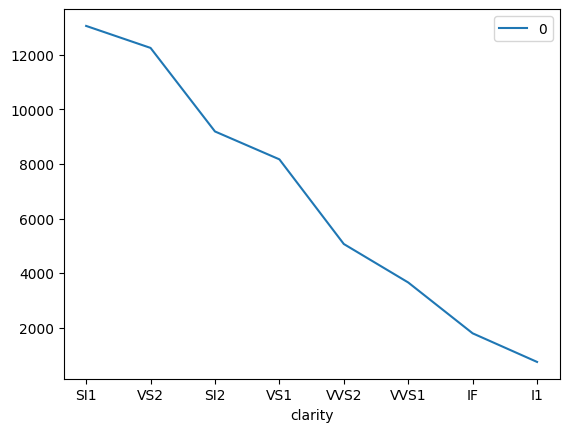

In [315]:
clarity_count_hist = pd.DataFrame(clarity_count, index=clarity_count.index)
clarity_count_hist.plot()


Let's say we're building an online store. We want to filter the diamonds based on certain qualities.

<b> 4) Drop the depth, table and x, y, z columns from the data frame.

In [316]:
diamonds_ten.drop(["depth","table","x","y","z"], axis=1)

,carat,cut,color,clarity,price
45116,0.71,Good,I,SI1,1651
52221,0.71,Premium,F,SI2,2482
51950,0.70,Premium,E,SI2,2442
25628,2.01,Premium,F,SI1,14502
10754,1.09,Very Good,F,SI2,4853
16623,1.07,Premium,G,VS2,6644
24871,1.57,Premium,F,SI1,13288
36008,0.31,Ideal,F,IF,921
53568,0.70,Good,E,SI1,2696
20673,1.03,Ideal,G,VVS1,8955


<b> 5) Add a new column named `cut_index`. This will be the index of the cut based on the following list:

`[Fair, Good, Very Good, Premium, Ideal]`

So Fair would be 0, Good 1, etc.

In [317]:
cut_list = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_index = {cut: index for index, cut in enumerate(cut_list)}

diamonds_ten['cut_index'] = diamonds_ten['cut'].map(cut_index)
diamonds_ten

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_index
45116,0.71,Good,I,SI1,60.0,64.0,1651,5.71,5.79,3.45,1
52221,0.71,Premium,F,SI2,61.6,59.0,2482,5.75,5.71,3.53,3
51950,0.70,Premium,E,SI2,60.6,58.0,2442,5.78,5.73,3.49,3
25628,2.01,Premium,F,SI1,59.5,58.0,14502,8.21,8.18,4.88,3
10754,1.09,Very Good,F,SI2,63.2,58.0,4853,6.54,6.49,4.12,2
16623,1.07,Premium,G,VS2,62.5,57.0,6644,6.58,6.50,4.09,3
24871,1.57,Premium,F,SI1,58.3,58.0,13288,7.72,7.68,4.49,3
36008,0.31,Ideal,F,IF,61.1,54.0,921,4.39,4.42,2.69,4
53568,0.70,Good,E,SI1,60.4,61.0,2696,5.73,5.76,3.47,1
20673,1.03,Ideal,G,VVS1,59.9,61.0,8955,6.56,6.63,3.95,4


<b> 6) Inflation took on and the prices are rising! Use the `carat` and `cut_index` to calculate a new price. Use the formula:

`new_price = old_price * (1 + cut_index / 10)`

In [318]:
diamonds_ten['price'] = diamonds_ten['price'] * (diamonds_ten['cut_index'] / 10) + 1
diamonds_ten

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_index
45116,0.71,Good,I,SI1,60.0,64.0,166.1,5.71,5.79,3.45,1
52221,0.71,Premium,F,SI2,61.6,59.0,745.6,5.75,5.71,3.53,3
51950,0.70,Premium,E,SI2,60.6,58.0,733.6,5.78,5.73,3.49,3
25628,2.01,Premium,F,SI1,59.5,58.0,4351.6,8.21,8.18,4.88,3
10754,1.09,Very Good,F,SI2,63.2,58.0,971.6,6.54,6.49,4.12,2
16623,1.07,Premium,G,VS2,62.5,57.0,1994.2,6.58,6.50,4.09,3
24871,1.57,Premium,F,SI1,58.3,58.0,3987.4,7.72,7.68,4.49,3
36008,0.31,Ideal,F,IF,61.1,54.0,369.4,4.39,4.42,2.69,4
53568,0.70,Good,E,SI1,60.4,61.0,270.6,5.73,5.76,3.47,1
20673,1.03,Ideal,G,VVS1,59.9,61.0,3583.0,6.56,6.63,3.95,4
